In [2]:
# initial library imports

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# dataframe reading and preprocessing

df = pd.read_csv('prices.csv')
df.drop_duplicates(subset='time', keep='first', inplace=True)
df.head()

,time,price
0,1,413
1,9,447
2,19,399
3,29,417
4,39,442


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


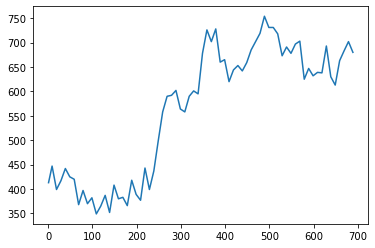

In [4]:
# cleaning plotting the univariate time series
df.drop_duplicates(subset='time', keep='first', inplace=True)
plt.plot(df['time'], df['price'])
plt.show()

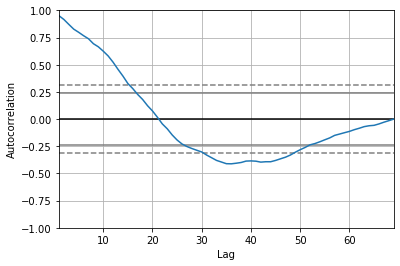

In [5]:
# autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['price'])
plt.show()

# a positive correlation is observed in the first 12 lags - AR parameter 5 is a good starting point

#### ARIMA model

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.



Test RMSE : 39.259
Test mean absolute error : 31.634


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


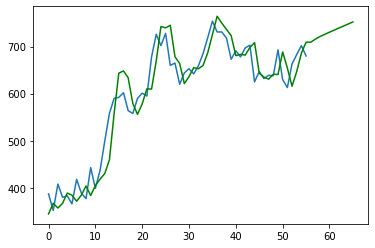

In [8]:
# rolling forecast with ARIMA model
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# hyperparameters
tts = 0.2 # train-test split
forecasttill = 10 # number of points to forecast
p = 3 # AR parameter
d = 2 # differencing parameter
q = 1 # MA parameter

series = df['price']

# split into train and test sets
X = series.values
size = int(len(X) * tts)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):

    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE : %.3f' % rmse)
mae = mean_absolute_error(test, predictions)
print('Test mean absolute error : %.3f' % mae)

# Forecast
forecast = model_fit.forecast(forecasttill, alpha=0.05)  # 95% confidence
chart = predictions.copy()
chart = chart + forecast.tolist()

# plot forecasts against actual outcomes and future predictions
plt.plot(test)
plt.plot(chart, color='green')
plt.show()